In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# pm1 y pm2 en minutos (puede tener decimales)
pm1 = 595
pm2 = 649

In [3]:
the_path = os.getcwd()
data_path = os.path.join(the_path, '../data/processed-data/')
file_name = 'BTC-USDT-processed.csv'
file_path = data_path + file_name
df = pd.read_csv(file_path, index_col='Date')

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,Average
Date,
2018-02-23 03:39:00,10299.95
2018-02-23 03:40:00,10899.90
2018-02-23 03:41:00,10899.90
2018-02-23 03:42:00,10899.90
2018-02-23 03:43:00,10899.90


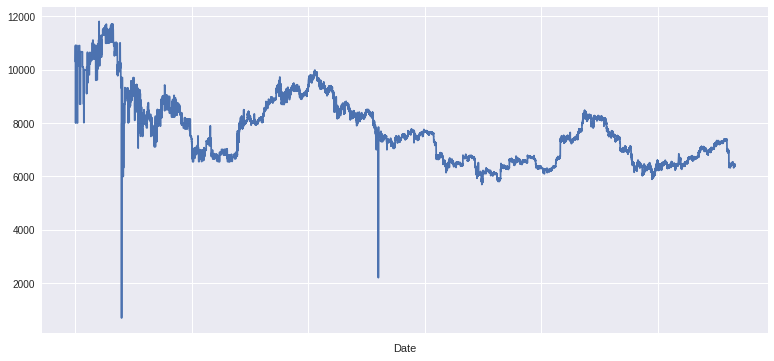

In [5]:
df['Average'].plot(figsize=(13,6))

In [17]:
# getting just last 6 months
df.index = pd.to_datetime(df.index)
df_M = df.last('48H').copy()
df_M.head(5)

,Average
Date,
2018-09-05 18:08:00,6923.20
2018-09-05 18:09:00,6923.20
2018-09-05 18:10:00,6936.50
2018-09-05 18:11:00,6935.70
2018-09-05 18:12:00,6932.65


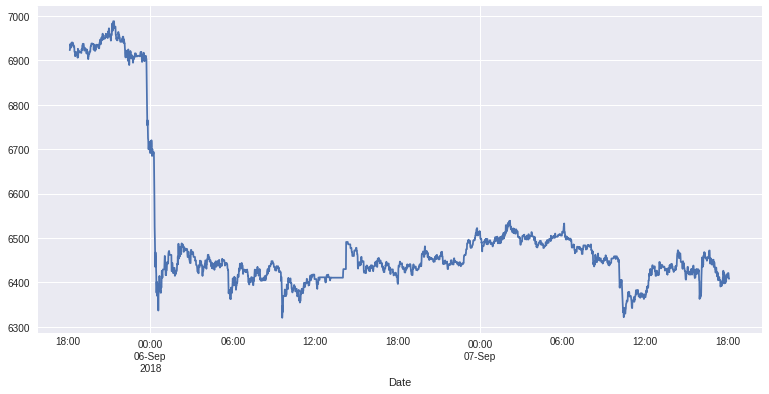

In [18]:
df_M['Average'].plot(figsize=(13,6))

In [19]:
df_M['PM1'] = df_M['Average'].rolling(pm1).mean()
df_M['PM2'] = df_M['Average'].rolling(pm2).mean()
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2
Date,,,
2018-09-06 04:56:00,6437.40,6690.788866,6710.170686
2018-09-06 04:57:00,6442.70,6689.980882,6709.430316
2018-09-06 04:58:00,6442.40,6689.157353,6708.689484
2018-09-06 04:59:00,6444.25,6688.336933,6707.931009
2018-09-06 05:00:00,6450.70,6687.519118,6707.183706


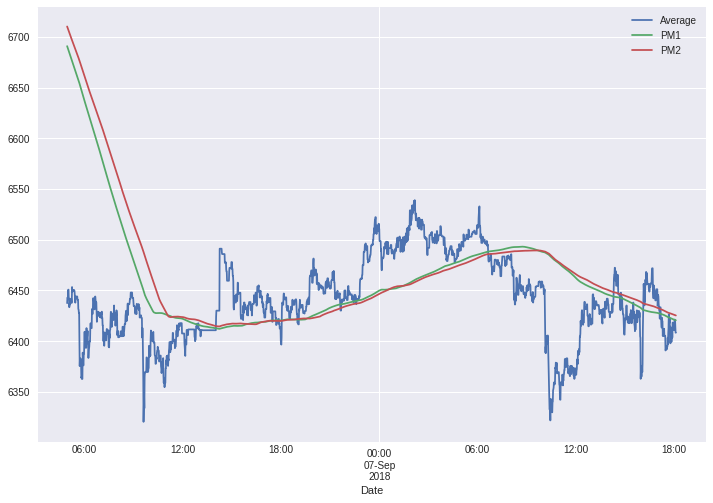

In [20]:
df_M.plot(figsize=(12,8))

In [21]:
df_M['Posicion'] = np.where(df_M['PM1'] > df_M['PM2'], 1, -1)

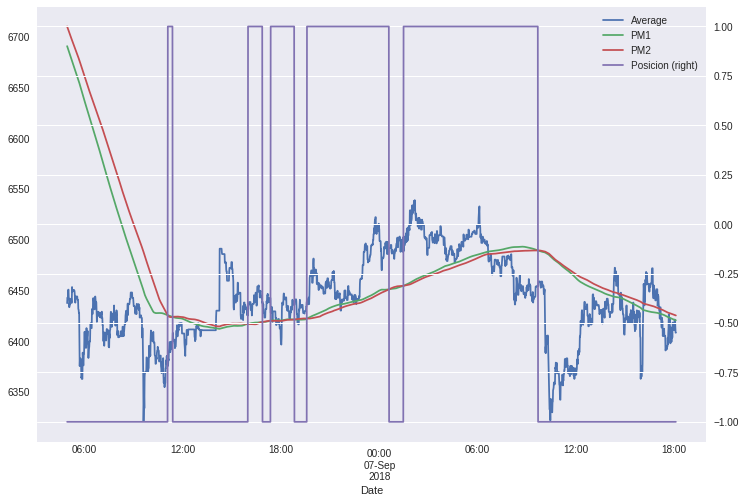

In [22]:
df_M.plot(figsize=(12,8), secondary_y = 'Posicion')

In [23]:
df_M['Retornos'] = np.log(df_M['Average']/df_M['Average'].shift(1))

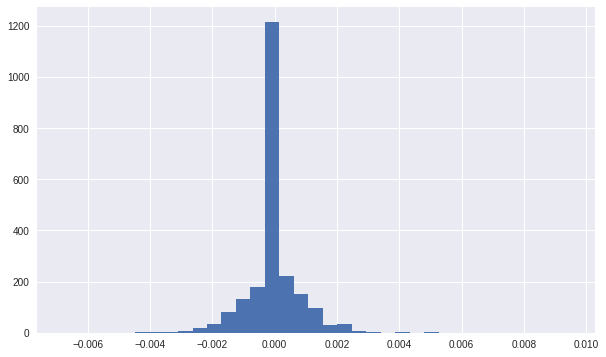

In [24]:
df_M['Retornos'].hist(bins=35, figsize=(10,6));

In [25]:
df_M.dropna(inplace = True)
df_M['Estrategia'] = df_M['Retornos']* df_M['Posicion'].shift(1)
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2,Posicion,Retornos,Estrategia
Date,,,,,,
2018-09-06 04:58:00,6442.40,6689.157353,6708.689484,-1,-0.000047,0.000047
2018-09-06 04:59:00,6444.25,6688.336933,6707.931009,-1,0.000287,-0.000287
2018-09-06 05:00:00,6450.70,6687.519118,6707.183706,-1,0.001000,-0.001000
2018-09-06 05:01:00,6450.70,6686.701303,6706.441102,-1,0.000000,-0.000000
2018-09-06 05:02:00,6441.90,6685.868697,6705.685478,-1,-0.001365,0.001365


In [26]:
df_M['Retacum'] = df_M['Retornos'].cumsum().apply(np.exp)
df_M['Estracum'] = df_M['Estrategia'].cumsum().apply(np.exp)
df_M.tail()

,Average,PM1,PM2,Posicion,Retornos,Estrategia,Retacum,Estracum
Date,,,,,,,,
2018-09-07 18:03:00,6421.1,6420.902983,6425.673151,-1,0.000000,-0.000000,0.996647,1.022730
2018-09-07 18:04:00,6421.1,6420.830042,6425.582357,-1,0.000000,-0.000000,0.996647,1.022730
2018-09-07 18:05:00,6413.1,6420.736765,6425.487442,-1,-0.001247,0.001247,0.995406,1.024006
2018-09-07 18:06:00,6408.3,6420.638109,6425.385131,-1,-0.000749,0.000749,0.994661,1.024773
2018-09-07 18:07:00,6408.3,6420.534748,6425.278313,-1,0.000000,-0.000000,0.994661,1.024773


([], <a list of 0 Text xticklabel objects>)

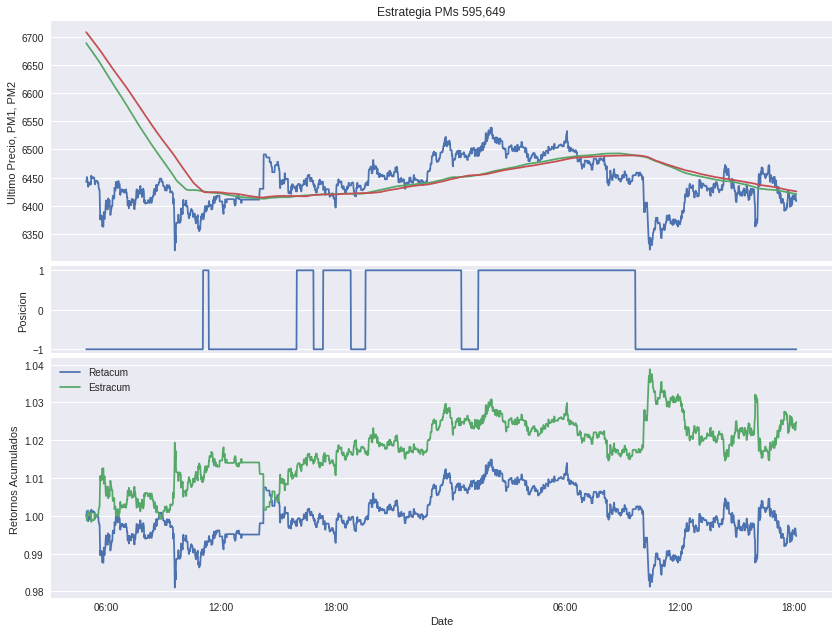

In [27]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((25,1),(0,0),rowspan = 8, colspan = 1)
df_M['Average'].plot(title = ('Estrategia PMs ' + str(pm1) + ',' + str(pm2)))
df_M['PM1'].plot(ax=ax1)
df_M['PM2'].plot(ax=ax1)

ax1.set_ylabel('Ultimo Precio, PM1, PM2')
plt.xticks([],[])

ax2 = plt.subplot2grid((25,1),(8,0), rowspan = 3, colspan = 1)
df_M['Posicion'].plot(ylim=[-1.1,1.1])
ax2.set_ylabel('Posicion')
plt.xticks([],[])

ax3=plt.subplot2grid((25,1),(11,0),rowspan = 8, colspan = 1)
df_M[['Retacum', 'Estracum']].plot(ax = ax3)
ax3.set_ylabel('Retornos Acumulados')
plt.xticks([],[])